In [1]:
#imports
import os
import shutil

import cv2
import numpy as np

import Augmentor 
import random 

import matplotlib.pyplot as plt

In [2]:
#Data located in folder on Computer outside current working directory since github cannot handle large amounts of data
os.chdir("..")

path = os.getcwd()
print(path)

#Extracting Data from tar files
tars = os.listdir(path + '/labelled_images/')
new_path = path + '/Data/'
os.mkdir(new_path)
for tar in tars:
  path_to_file = path + '/labelled_images/' + tar
  shutil.unpack_archive(path_to_file, new_path+'/')

path = new_path
classes = os.listdir(path)
classes.sort()
#Number of Classes found
print(classes)

c:\Users\Divya\Desktop\Kvasir-Capsule-ML-Project
['Ampulla of vater', 'Angiectasia', 'Blood - fresh', 'Blood - hematin', 'Erosion', 'Erythema', 'Foreign body', 'Ileocecal valve', 'Lymphangiectasia', 'Normal clean mucosa', 'Polyp', 'Pylorus', 'Reduced mucosal view', 'Ulcer']


In [3]:
#Function to visualize class distributions and return the count of each class
def visualise_class_distribution():
  class_paths = [os.path.join(path, d) for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]
  # Count the number of images in each subdirectory
  counts = [0] * len(class_paths)
  for i, directory in enumerate(class_paths):
      counts[i] = len(os.listdir(directory))
  print(counts)
  # Create a bar chart to visualize the distribution
  plt.bar(classes, counts)
  plt.xticks(rotation=90)
  plt.ylabel("Class Imbalance")
  plt.title("Data Distribution across Classes")
  plt.show()
  return counts

[10, 866, 446, 12, 506, 159, 776, 4189, 592, 34338, 55, 1529, 2906, 854]


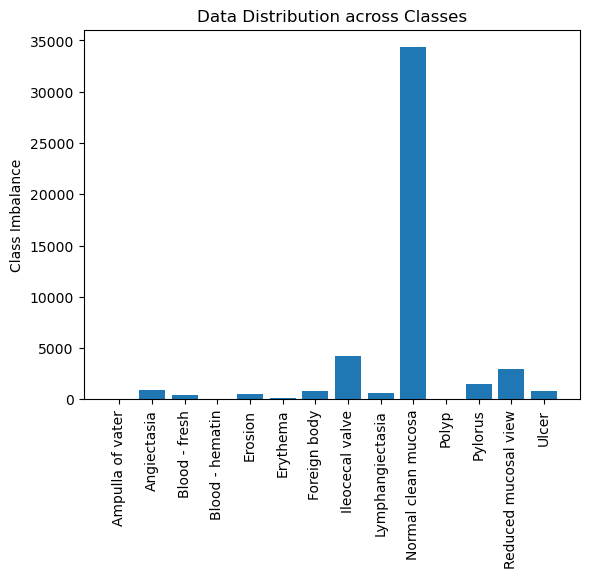

In [4]:
#Visualize the class distributions 
counts = visualise_class_distribution()

Clearly, the datset is highly imbalanced mainly consisting of Normal Mucosa Images.

In [5]:

#Get Image Information on nature of each image

# Initialize empty lists to store the information
sizes = []
resolutions = []
color_distributions = []

# Iterate over each image file in each subdirectory
for path_, dir_, files in os.walk(path):
    for filename in files:
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(path_, filename)
            img = cv2.imread(img_path)

            #Image size
            size = os.path.getsize(img_path)
            sizes.append(size)

            #Image esolution
            resolution = img.shape[:2]
            resolutions.append(resolution)

            #Image Color Distribution
            color_distribution = np.bincount(img.flatten(), minlength=256)
            color_distributions.append(color_distribution)


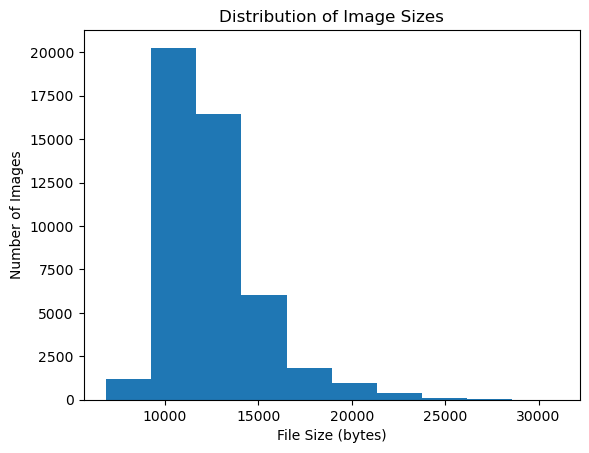

In [6]:
#View Image Sizes Distribution
plt.hist(sizes)
plt.title("Distribution of Image Sizes")
plt.xlabel("File Size (bytes)")
plt.ylabel("Number of Images")
plt.show()

Expectedly, the images are not of the same sizes as they are extracted from videos

In [7]:
#Checking Resolution to check dimentionality for training data on ML model later
print(all(i == resolutions[0] for i in resolutions))
#All the images in this dataset are of the same Resolution
print("Image Resolution : ", resolutions[0])

True
Image Resolution :  (336, 336)


We are not working with any grey scaled data, so it makes sence to observe if there is some consistencey in the color distributions across the images as this could pottentially effect the models behaviour

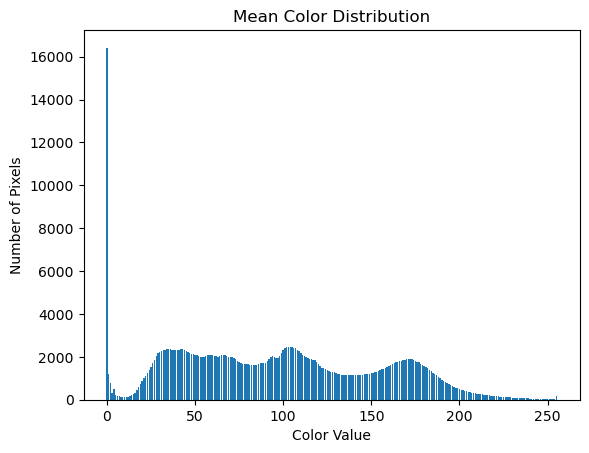

In [8]:
#Observed Color Distribution
mean_color_distribution = np.mean(color_distributions, axis=0)

# Plot a bar chart of the mean color distribution
plt.bar(np.arange(256), mean_color_distribution)
plt.title("Mean Color Distribution")
plt.xlabel("Color Value")
plt.ylabel("Number of Pixels")
plt.show()

**DATA AUGMENTATION**

In order to efficiently train the model, I will Augment the image classes to an average value, leaving out the Normal Images as they are excessive and need to be dealt with differently.

In [9]:
#Augmenting All Data Classes except for the Normal Mucosa class
classes.remove('Normal clean mucosa')
counts.pop(counts.index(max(counts)))

new_path = os.getcwd() + '/AugmentedData/'
os.mkdir(new_path)

#Augmenting All data points upto the average number of data points
N = int(sum(counts) / len(counts))
for n, cl in zip(counts, classes):
  if n > N:
    shutil.move(path+cl, new_path+cl)
  else:
    p = Augmentor.Pipeline(path + cl)
    #Skewing the Data
    p.skew(probability = 0.3)
    #Elastic Distortion
    p.random_distortion(probability=0.3, grid_width=15, grid_height=15, magnitude=10)
    #Shearing
    p.shear(probability=0.3, max_shear_left=15, max_shear_right=15)
    #No of Total imagesAugmented Images
    p.sample(N)
    shutil.move(path+cl+'/output', new_path+cl)

Initialised with 10 image(s) found.
Output directory set to c:\Users\Divya\Desktop\Kvasir-Capsule-ML-Project/Data/Ampulla of vater\output.

Executing Pipeline:   0%|          | 0/992 [00:00<?, ? Samples/s]

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=336x336 at 0x1D1605F2C60>: 100%|██████████| 992/992 [00:02<00:00, 339.46 Samples/s]


Initialised with 866 image(s) found.
Output directory set to c:\Users\Divya\Desktop\Kvasir-Capsule-ML-Project/Data/Angiectasia\output.

Processing <PIL.Image.Image image mode=RGB size=336x336 at 0x1D16057BB60>: 100%|██████████| 992/992 [00:03<00:00, 321.60 Samples/s]                   


Initialised with 446 image(s) found.
Output directory set to c:\Users\Divya\Desktop\Kvasir-Capsule-ML-Project/Data/Blood - fresh\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=336x336 at 0x1D1618CE150>: 100%|██████████| 992/992 [00:02<00:00, 345.59 Samples/s] 


Initialised with 12 image(s) found.
Output directory set to c:\Users\Divya\Desktop\Kvasir-Capsule-ML-Project/Data/Blood - hematin\output.

Processing <PIL.Image.Image image mode=RGB size=336x336 at 0x1D15F16B740>: 100%|██████████| 992/992 [00:02<00:00, 347.49 Samples/s]                  


Initialised with 506 image(s) found.
Output directory set to c:\Users\Divya\Desktop\Kvasir-Capsule-ML-Project/Data/Erosion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=336x336 at 0x1D167353020>: 100%|██████████| 992/992 [00:03<00:00, 303.70 Samples/s]


Initialised with 159 image(s) found.
Output directory set to c:\Users\Divya\Desktop\Kvasir-Capsule-ML-Project/Data/Erythema\output.

Processing <PIL.Image.Image image mode=RGB size=336x336 at 0x1D16766A1B0>: 100%|██████████| 992/992 [00:02<00:00, 350.20 Samples/s]                  


Initialised with 776 image(s) found.
Output directory set to c:\Users\Divya\Desktop\Kvasir-Capsule-ML-Project/Data/Foreign body\output.

Processing <PIL.Image.Image image mode=RGB size=336x336 at 0x1D1605F23F0>: 100%|██████████| 992/992 [00:02<00:00, 357.24 Samples/s]                  


Initialised with 592 image(s) found.
Output directory set to c:\Users\Divya\Desktop\Kvasir-Capsule-ML-Project/Data/Lymphangiectasia\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=336x336 at 0x1D1605EFB90>: 100%|██████████| 992/992 [00:02<00:00, 341.60 Samples/s]


Initialised with 55 image(s) found.
Output directory set to c:\Users\Divya\Desktop\Kvasir-Capsule-ML-Project/Data/Polyp\output.

Processing <PIL.Image.Image image mode=RGB size=336x336 at 0x1D15EDE1970>: 100%|██████████| 992/992 [00:02<00:00, 363.23 Samples/s]                  


Initialised with 854 image(s) found.
Output directory set to c:\Users\Divya\Desktop\Kvasir-Capsule-ML-Project/Data/Ulcer\output.

Processing <PIL.Image.Image image mode=RGB size=336x336 at 0x1D1673EC500>: 100%|██████████| 992/992 [00:02<00:00, 350.83 Samples/s]                  


For this project, due to the lack of computational resources, I've decided to scale down the data.
For this, I will only be undersampling the Normal mucosa data class to match the image count of the second largest class in the remaining dataset.

Note : These images are frames identified and extracted from a video source, hence the images are repetitive and I do not expect to loose a lot of important information through this process.

Here I will manually randomly undersample the data points as it is computationally easy and efficient.

In [10]:
#Manually randomly sampling images from the largest image class to match the second largest class count
#We are doing this to scale the data roughly to some extent and make it computationally less expensive to train the model
N = max(counts)
#Matching it to the largest class in Augmented Dataset
cls_ = '/Normal clean mucosa/'
os.mkdir(new_path+cls_)
file_list = os.listdir(path+cls_)
for i in range(N): 
  f = random.choice(file_list)
  file_list.remove(f)
  shutil.copy(path+cls_+f, new_path+cls_)

path = new_path
classes = os.listdir(new_path)
classes.sort()

[992, 992, 992, 992, 992, 992, 992, 4189, 992, 4189, 992, 1529, 2906, 992]


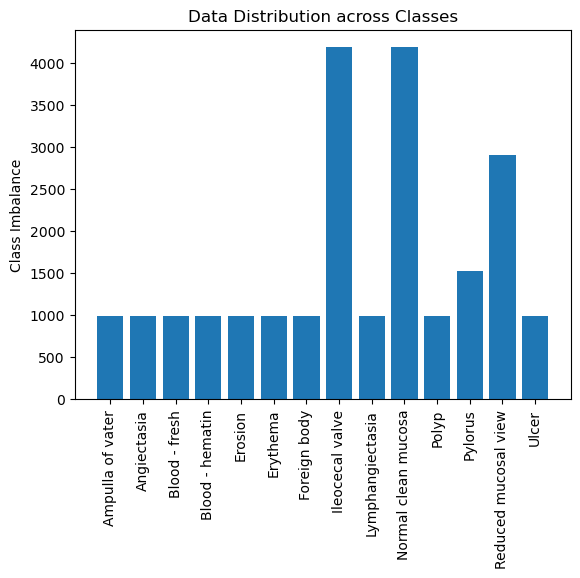

In [11]:
#Final results of Augmented Data
count = visualise_class_distribution()